### Dataset for this study is imported from Kaggle

1. Import libraries and data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


2. Before we dive into code, let's understand the data , cleanse it before we start modelling

In [2]:
#Total number of missing values for each feature
print (df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


bmi has 201 missing values and the other's have 0 missing values.
The  next step will be to substitute missing values with mean of bmi and check if imputations are to be done.

In [3]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Now, let's look at some descriptive statistics of our dataset

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df = df.drop(columns ='id')
df.shape

(5110, 11)

In [7]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

    Gender needs to be categorized as binary variable. Hence, impute this single value with mode in this column

### Exploratory Data Analysis


### Numerical Feature Analysis


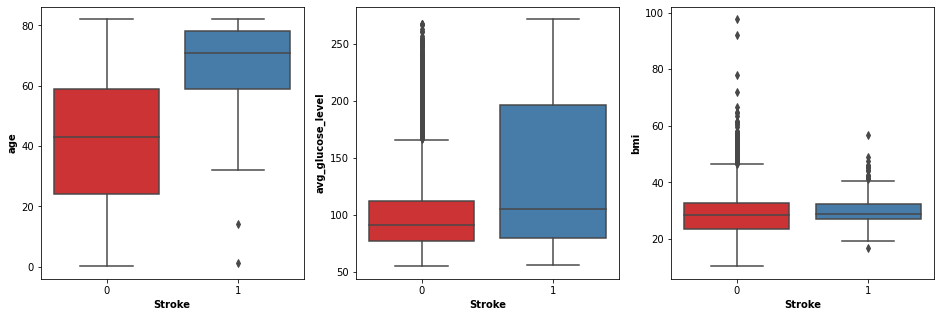

In [8]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn
age: Subjects with stroke tends to have higher mean age.

ave glucose level: Subjects with stroke tends to have higher average glucose level.

bmi: bmi index does not give much indication on the likelihood of experiencing stroke. bmi index for super obesity is 50. Outliers in this feature should be replaced to its highest limit (50).
There are total 79 counts of outliers detected.

In [9]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

Replace values more than 50 in bmi column to 50.


In [10]:
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

By plotting boxplot of bmi column to confirm alterations are made.


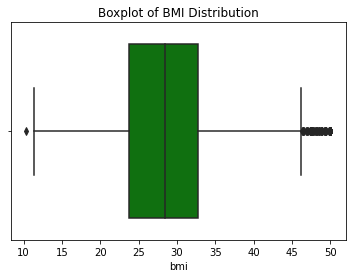

In [11]:
sns.boxplot(data=df,x=df["bmi"],color='green')
plt.title("Boxplot of BMI Distribution");

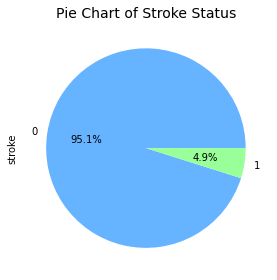

In [12]:
plt.figure(figsize=(4,4))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

4.9% of the population in this dataset is diagnosed with stroke


### Multicollinearity Analysis


Since correlation check only accept numerical variables, preprocessing the categorical variables becomes a necessary step, we need to convert these categorical variables to numbers encoded to 0 or 1. We use labelEncoder from sklearn.preprocessing as it will be easy to decode a particular label back later after predicting if required.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df_en = df
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


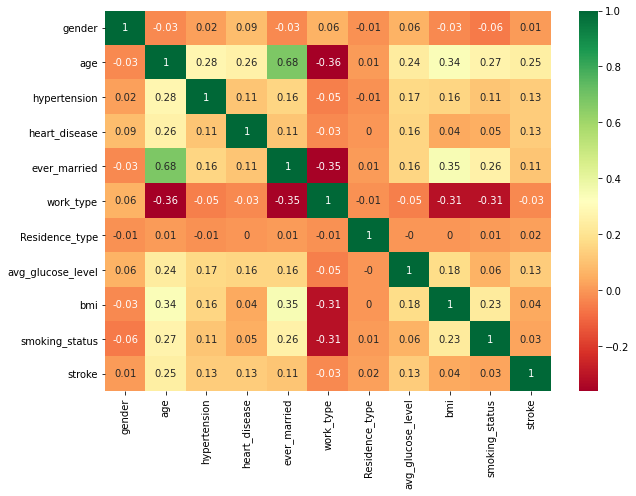

In [14]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='RdYlGn');

From the above correlation matrix, we can verify the presence of multicollinearity between some of the variables. For instance, the ever_married and age column has a correlation of 0.68. Between this two attributes, age contains more information on whether one is susceptible to stroke. Thus, we will drop the ever_married column.

In [15]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


**Final Preprocessing**


Variables that are measured at different scales do not contribute equally to model fitting and might end up creating a bias. Thus, to deal with this potential problem feature standardization (μ=0, σ=1) is usually used prior to model fitting. We have created an object of StandardScaler() and then applied fit_transform() function to apply standardization on ‘avg_glucose_level’,’bmi’ and ‘age’ columns.

In [16]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [17]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390


## Modelling

In [18]:
x=df.drop(['stroke'], axis=1)
y=df['stroke']
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

Building models with their parameters and storing them into a dictionary. We will explore 7 algorithms to see which produces reliable and repeatable results. The 7 algorithms are:

Decision Tree

Logistic Regression

Random Forest

Support Vector Machine

K Nearest Neighbour

Naive Bayes

KMeans Clustering

In [19]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logreg model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


In [20]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Decision Tree--------------------
[[1393   71]
 [  62    7]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.09      0.10      0.10        69

    accuracy                           0.91      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.92      0.91      0.92      1533

--------------------Logreg--------------------
[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

--------------------Random Forest--------------------
[[1461    3]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00

In [22]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))


Summary of Accuracy Score


Decision Tree Model:  0.9132
Logreg Model:  0.955
Random Forest Model:  0.953
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.2172


From the above accuracy summary, Logistic Regression, Random Forest and KNN models all gives high accuracy score of 0.95. However, it is also important to consider the error type and recall value of each model. Models with 0.95 accuracy score generally have high false negative as shown in the confusion matrix. High false negative indicates type 2 error. For our study on stroke prediction, we want to avoid type 2 error as it means that we fail to identify subjects that has stroke and deem them stroke free instead. Inspecting from the classification report above, Naive Bayes Model has fit our objective although the accuracy is 0.87.

### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.87430168 0.84916201 0.88826816 0.87709497 0.89944134 0.88547486
 0.86592179 0.86554622 0.86834734 0.85714286]


In [24]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.8731
